In [1]:
import process as pc
from IPython.core.interactiveshell import InteractiveShell

from sklearn.svm import LinearSVC
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_float
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import joblib
import cv2

from sklearn.decomposition import PCA
import numpy as np

InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False

In [2]:
positive_images_path = pc.DATA_PATH+"/img_align_celeba"
negative_images_path = pc.DATA_PATH+"/caltech-101/101_ObjectCategories"

pc.extract_dataset(positive_images_path)
bad_imgs_path_list = pc.extract_dataset(negative_images_path, folder="multi_folders")

Dataset already extracted


In [3]:
n_good_images = 7700
n_bad_images_folder=250
size_w = size_h = 128

img_list = pc.load_images(positive_images_path, number_of_images=n_good_images, random_seed=7) 
img_tmp = pc.load_image(positive_images_path)
img_tmp = img_as_float(cv2.imread(img_tmp))
images = np.empty((n_good_images, size_w, size_h), dtype=np.uint8)

for i, img in enumerate(img_list):
    images[i, ...] = pc.process_image(pc.DATA_PATH+"/img_align_celeba/"+img, resize=True, img_resize=(size_w, size_h))

Loaded image:  ../data/img_align_celeba/004925.jpg


In [4]:
bad_img_list = []
for fld in bad_imgs_path_list:
    tmp_img_list = pc.load_images(negative_images_path+"/"+fld, number_of_images=n_bad_images_folder, random_seed=7)
    bad_img_list += [negative_images_path+"/"+fld+'/'+img for img in tmp_img_list]


bad_images = np.empty((len(bad_img_list), size_w, size_h), dtype=np.uint8)
for i, img in enumerate(bad_img_list):
    bad_images[i, ...] = pc.process_image(img, resize=True, img_resize=(size_w, size_h))

/home/enrmic/ml_fondamenti_project/face_detection_project_2/src/user_warnings.py:4: UserWarning: The requested number of images is greater than the number of images in the folder
  warnings.warn("The requested number of images is greater than the number of images in the folder", UserWarning)


(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

(-0.5, 127.5, 127.5, -0.5)

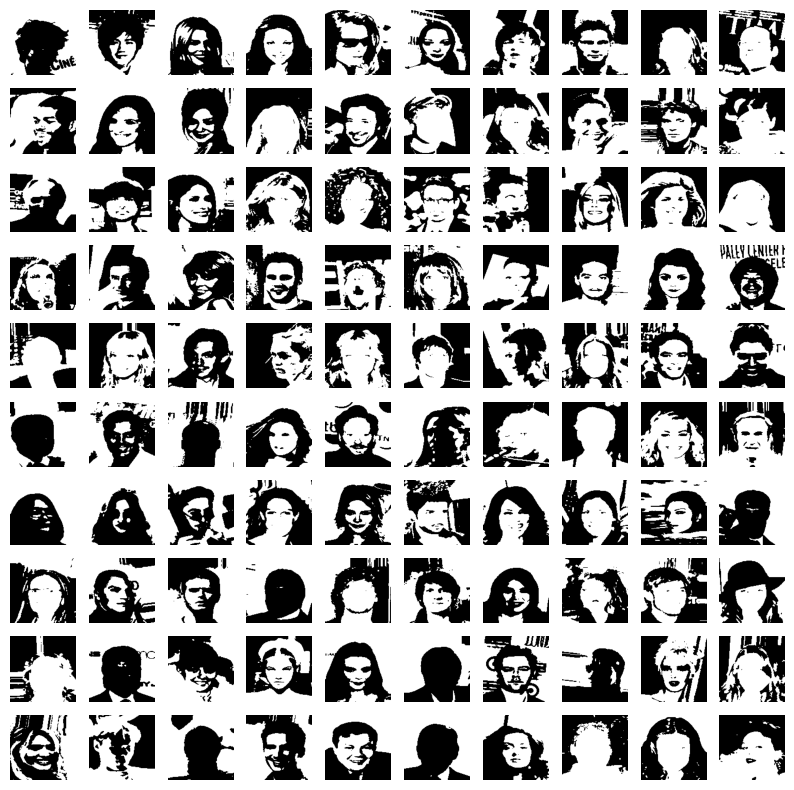

In [5]:
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(images[i*10+j], cmap='gray');
        ax[i, j].axis('off')

In [6]:
images.shape
bad_images.shape

(7700, 128, 128)

(7459, 128, 128)

In [7]:
dataset = np.concatenate((images, bad_images), axis=0)
dataset.shape

(15159, 128, 128)

In [8]:
good_samples = n_good_images
bad_samples = bad_images.shape[0]
n_keypoints = 32
n_features = 256
ftr_shape = n_keypoints*n_features
init = False
for i, img in enumerate(dataset):
   _, features = pc.extract_ORB_features(img, n_keypoints=32)
   if features is None:
      if i < good_samples:
            good_samples -= 1
      else:
         bad_samples -= 1
      continue
   features = features.flatten()
   if features.shape[0] == ftr_shape:
      if not init:
         X = np.array([features])
         init = True
      else:
         X = np.append(X, [features], axis=0)
   else:
      if i < good_samples:
         print("good sample")
         good_samples -= 1
      else:
         print("bad sample")
         bad_samples -= 1



good sample


In [ ]:
features.shape[0] == ftr_shape

In [ ]:
good_samples
bad_samples
y = np.concatenate((np.ones(good_samples), np.zeros(bad_samples))) 
X.shape
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=7)

In [ ]:
X_train.shape
y_train.shape

X_train[0]
y_train[0]


In [ ]:
pca = PCA(n_components=32, whiten=True, random_state=7)
pca.fit(X_train)
var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var)
plt.ylim(0, 1.02)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()
var


In [ ]:
idx = [i for i in range(len(var)) if var[i] > 0.95]
idx

In [ ]:
if 0:
    pca = PCA(n_components=idx[-1], whiten=True, random_state=7)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_train_pca.shape
    y_train.shape
    print("PCA done")
else:
    X_train_pca = X_train
    X_test_pca = X_test

In [ ]:
param_grid = { 'C' : [np.power(10., i) for i in range(-2, 2)],
               'max_iter' : [7500],
               'random_state' : [7] }

grid_searh = GridSearchCV(LinearSVC(), param_grid, cv=5, n_jobs=2)
grid_searh.fit(X_train_pca, y_train)
grid_searh.best_params_

In [ ]:
best_svc = grid_searh.best_estimator_

best_svc.score(X_train_pca, y_train)

best_svc.score(X_test_pca, y_test)

In [ ]:
y_pred = best_svc.predict(X_train_pca)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy test:", accuracy)


y_pred = best_svc.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy)

In [ ]:
pipeline_save_path = pc.DATA_PATH+"/svm_model_threshold.pkl"

from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    steps=[
        ('preprocess', pc.process_image),
        ('extract_features', pc.extract_ORB_features),
        ('pca', pca),
        ('svc', best_svc)  
    ])

joblib.dump(
    pipeline, pipeline_save_path
    )

In [ ]:
pipeline_save_path = pc.DATA_PATH+"/svm_model_threshold.pkl"
image_path = pc.DATA_PATH+"/final/Valentino_Rossi_2017.jpg"

pipeline = joblib.load(pipeline_save_path)

image = mpimg.imread(image_path)

pc.detect_faces(image_path, pipeline, threshold=0.75, window_size=(128, 128), step_size=(16,16))
